In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('./datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [13]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

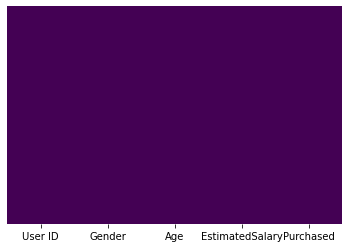

In [14]:
sns.heatmap(df.isna(),cbar=False,yticklabels=False,cmap='viridis')

## Data Visualisation & Correlation analysis

<AxesSubplot:>

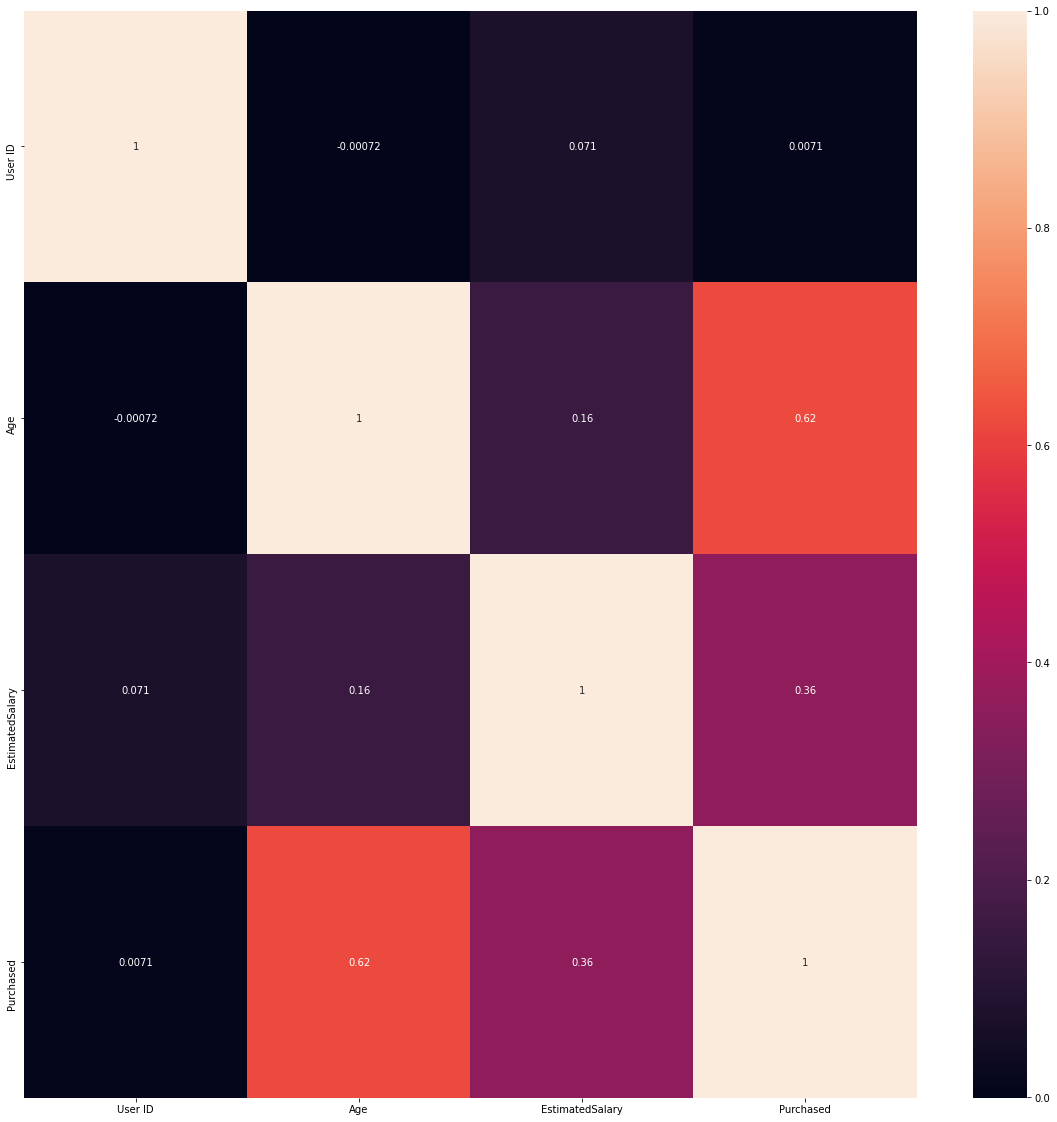

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [16]:
df.drop(['User ID','Gender'],axis='columns',inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [19]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.675

## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[54,  0],
       [26,  0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

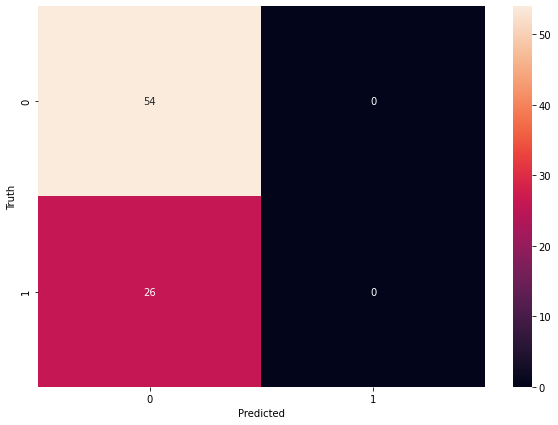

In [24]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')